# OX 분류 모델을 만들어보자.
- Yolo를 배우기 전이기 때문에 손글씨는 어렵고 픽셀이 이어져 있는 아이패드로 그린 데이터 또는 그림판으로 그린 데이터를 준비한다.
- 크기는 각양각색이어도 되지만 편의를 위해 150*150, jpg 데이터로 통일하였다.

## 데이터 가져오기

- 드라이브에 저장해둔 zip을 푼 뒤 안의 데이터를 가져온다.

In [ ]:
# 모아둔 OX 데이터
url = '/content/drive/MyDrive/DL_data/OX dataset-20220913T053518Z-001.zip'

In [ ]:
# 파이썬으로 zip을 다룰 수 있다.
import zipfile

content_zip = zipfile.ZipFile(url)
content_zip.extractall("/content/drive/MyDrive/DL_data")

content_zip.close()

In [ ]:
from glob import glob

O_list_raw = glob('/content/drive/MyDrive/DL_data/OX dataset/raw_O/*')
X_list_raw = glob('/content/drive/MyDrive/DL_data/OX dataset/raw_X/*')

In [ ]:
O_list_raw[:3]

['/content/drive/MyDrive/DL_data/OX dataset/raw_O/8_Taek.png',
 '/content/drive/MyDrive/DL_data/OX dataset/raw_O/7_JT.jpg',
 '/content/drive/MyDrive/DL_data/OX dataset/raw_O/3_JT.jpg']

- 각각 40개의 데이터가 들어있다.

In [ ]:
len(O_list_raw), len(X_list_raw)

(40, 40)

- requirement
  - OpenCV를 사용할 수도 있고, skimage를 사용할 수도 있다.

In [ ]:
  from skimage.transform import rescale, resize
  from skimage import color
  from skimage.io import imread, imsave
  import matplotlib.pyplot as plt
  import numpy as np

## 데이터 살펴보기

In [ ]:
def show_raw_img(O_list_raw, X_list_raw):
  sample = []
  plt.figure(figsize=(12,9))
  for i in range(6):
    plt.subplot(2, 3, i+1)
    random = np.random.randint(len(O_list_raw))
    
    # imread 통해 그릴 수 있게 주소 통해 가져옴
    if i < 3:
      image = imread(O_list_raw[random])
    else:
      image = imread(X_list_raw[random])

    # rgb(3D)에서 흑백 이미지(2D)로 변환
    image = color.rgb2gray(image)
    sample.append(image)

    # image show
    plt.imshow(image, cmap = 'gray')

    plt.title('O') if i<3 else plt.title('X')
    plt.axis('off')
  plt.show()

  return sample

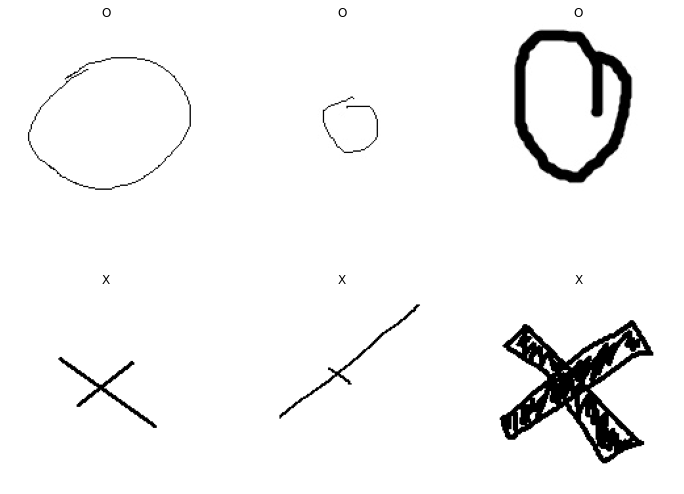

In [ ]:
sample = show_raw_img(O_list_raw, X_list_raw)

O X 가 참 못생겼다.

## 데이터 전처리

### 데이터 전처리 연습

- 위 OX를 resize 하면 이렇게 생겼다.

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


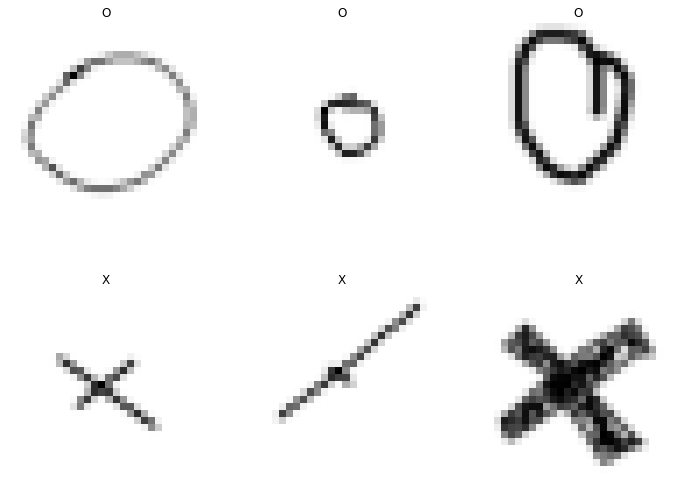

In [ ]:
plt.figure(figsize=(12,9))
for idx,image in enumerate(sample):
  plt.subplot(2,3,idx+1)
  img_resized = resize(image, (28,28))
  print(img_resized.shape)
  plt.imshow(img_resized, cmap='gray')
  plt.title('O') if idx<3 else plt.title('X')
  plt.axis('off')
plt.show()

- resized 한 데이터 하나 저장해보자.

In [ ]:
# 255로 나눴던 것을 다시 돌려주고 저장하는 과정이다. 
imsave('/content/drive/MyDrive/DL_data/OX dataset/tmp.png', np.round(img_resized*255).astype(np.uint8))

- 저장 잘 되었나 확인

(28, 28)


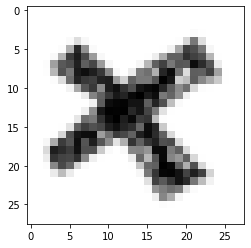

In [ ]:
tmp = imread("/content/drive/MyDrive/DL_data/OX dataset/tmp.png")
print(tmp.shape)
plt.imshow(tmp, cmap ='gray')
plt.show()

### 파일 이름 추출 연습

In [ ]:
O_list_raw[0]

'/content/drive/MyDrive/DL_data/OX dataset/raw_O/8_Taek.png'

In [ ]:
O_list_raw[0].split('/')

['',
 'content',
 'drive',
 'MyDrive',
 'DL_data',
 'OX dataset',
 'raw_O',
 '8_Taek.png']

In [ ]:
O_list_raw[0].split('/')[-1][:-4]

'8_Taek'

### 전처리 시작


- Train, Test data split

In [ ]:
O_list_raw = glob('./drive/MyDrive/DL_data/OX dataset/raw_O/*')
X_list_raw = glob('./drive/MyDrive/DL_data/OX dataset/raw_X/*')

# 20퍼센트 만큼을 validation으로 할당
test_idx = np.random.choice(len(O_list_raw),np.round(len(O_list_raw)*0.2).astype(int),replace=False)

In [ ]:
train_O = []
test_O = []
train_X = []
test_X = []

j=0
test_idx.sort()
for i in range(len(O_list_raw)):
  if j<len(test_idx) and i == test_idx[j]:
    test_O.append(O_list_raw[i])
    test_X.append(X_list_raw[i])
    j += 1

  else:
    train_O.append(O_list_raw[i])
    train_X.append(X_list_raw[i])

len(train_O), len(train_X), len(test_O), len(test_X)

(32, 32, 8, 8)

- resize 처리 후 저장

In [ ]:
def img_resize(img):
  img = color.rgb2gray(img)
  return resize(img,(28,28))

In [ ]:
from tqdm.notebook import tqdm

def convert_OX(convert_list, folder_name, status):
  for each in tqdm(convert_list):
    img = imread(each)
    img_resized = img_resize(img)
    save_name = f'./drive/MyDrive/DL_data/OX dataset/{folder_name}/{status}/' + each.split('/')[-1][:-4] + '.png'
    imsave(save_name, np.round(img_resized*255).astype(np.uint8))

In [ ]:
ls './drive/MyDrive/DL_data/OX dataset/raw_O/'

10_HJ.jpg    2_JT.jpg    4_Taek.png  7_HJ.jpg    9_JT.jpg     O06_Sam.jpg
10_JT.jpg    2_Taek.png  5_HJ.jpg    7_JT.jpg    9_Taek.png   O07_Sam.jpg
10_Taek.png  3_HJ.jpg    5_JT.jpg    7_Taek.png  O01_Sam.jpg  O08_Sam.jpg
1_HJ.jpg     3_JT.jpg    5_Taek.png  8_HJ.jpg    O02_Sam.jpg  O09_Sam.jpg
1_JT.jpg     3_Taek.png  6_HJ.jpg    8_JT.jpg    O03_Sam.jpg  O10_Sam.jpg
1_Taek.png   4_HJ.jpg    6_JT.jpg    8_Taek.png  O04_Sam.jpg
2_HJ.jpg     4_JT.jpg    6_Taek.png  9_HJ.jpg    O05_Sam.jpg


In [ ]:
convert_OX(train_O, 'train','O')

  0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
convert_OX(train_X, 'train','X')


  0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
convert_OX(test_O,'test','O')


  0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
convert_OX(test_X,'test','X')


  0%|          | 0/8 [00:00<?, ?it/s]

## 모델

- image_generator

In [ ]:
# requirement
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import keras

np.random.seed(13)

- train datagenerator

In [ ]:
# 객체 호출
train_datagen = ImageDataGenerator(rescale=1./255)

# train 폴더 주소 던져주면, 안의 폴더에 따라 카테고리 분류를 한다.
train_generator = train_datagen.flow_from_directory(
    './drive/MyDrive/DL_data/OX dataset/train/',
    target_size = (28,28),
    batch_size = 7,
    class_mode = 'categorical'
)

Found 64 images belonging to 2 classes.


- test datagenerator

In [ ]:
# 객체 호출
test_datagen = ImageDataGenerator(rescale=1./255)

# test 폴더 주소 던져주면, 안의 폴더에 따라 카테고리 분류를 한다.
test_generator = test_datagen.flow_from_directory(
    './drive/MyDrive/DL_data/OX dataset/test/',
    target_size = (28,28),
    batch_size = 7,
    class_mode = 'categorical'
)

Found 16 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(28,28,3)))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 128)               4718720   
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 4,738,370
Trainable params: 4,738,370
Non-trainable params: 0
_________________________________________________________________


- 모델을 훈련
  - generator을 쓸 때도 fit()을 쓰겠끔 바뀌었다고 한다.

In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 25,
    validation_data = test_generator,
    validation_steps = 4
)

Epoch 1/25
7/8 [=========================>....] - ETA: 0s - loss: 8.7384e-05 - accuracy: 1.0000

8/8 [==============================] - 0s 54ms/step - loss: 7.7148e-05 - accuracy: 1.0000 - val_loss: 0.3863 - val_accuracy: 0.9375
Epoch 2/25
8/8 [==============================] - 0s 28ms/step - loss: 1.5459e-04 - accuracy: 1.0000
Epoch 3/25
8/8 [==============================] - 0s 20ms/step - loss: 1.2269e-04 - accuracy: 1.0000
Epoch 4/25
8/8 [==============================] - 0s 14ms/step - loss: 8.4371e-05 - accuracy: 1.0000
Epoch 5/25
8/8 [==============================] - 0s 15ms/step - loss: 8.2407e-05 - accuracy: 1.0000
Epoch 6/25
8/8 [==============================] - 0s 14ms/step - loss: 9.4862e-05 - accuracy: 1.0000
Epoch 7/25
8/8 [==============================] - 0s 16ms/step - loss: 9.6196e-05 - accuracy: 1.0000
Epoch 8/25
8/8 [==============================] - 0s 13ms/step - loss: 8.7365e-05 - accuracy: 1.0000
Epoch 9/25
8/8 [==============================] - 0s 14ms/step - loss: 1.1212e-04 - accuracy: 1.0000
Epoch 10/25
8/8 [==============================] - 0s 18ms/s

## 성능 평가

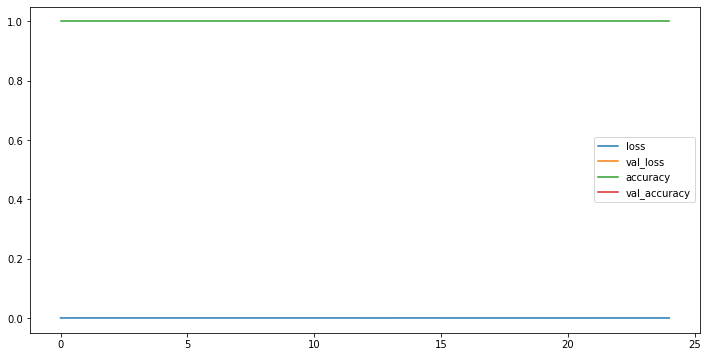

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

좋은걸까..?

In [ ]:
scores = model.evaluate(
    test_generator,
    steps = 4
)

print('%s: %.2f%%' %(model.metrics_names[1], scores[1]*100))

1/4 [======>.......................] - ETA: 0s - loss: 5.0213e-05 - accuracy: 1.0000

4/4 [==============================] - 0s 13ms/step - loss: 0.4366 - accuracy: 0.9375
accuracy: 93.75%


In [ ]:
pred = model.predict(test_generator)
pred

array([[9.7656941e-01, 2.3430645e-02],
       [1.0000000e+00, 2.0436084e-09],
       [9.9994254e-01, 5.7505218e-05],
       [1.6757951e-17, 1.0000000e+00],
       [2.1496671e-05, 9.9997854e-01],
       [1.0000000e+00, 1.7325417e-18],
       [6.4846281e-11, 1.0000000e+00],
       [9.9997818e-01, 2.1783253e-05],
       [6.8037676e-05, 9.9993193e-01],
       [1.0000000e+00, 3.8936687e-08],
       [9.9905199e-01, 9.4798609e-04],
       [1.3014945e-12, 1.0000000e+00],
       [9.9967051e-01, 3.2945312e-04],
       [1.0299740e-07, 9.9999988e-01],
       [1.1120272e-06, 9.9999893e-01],
       [9.9997783e-01, 2.2172520e-05]], dtype=float32)

In [ ]:
labels = test_generator.classes
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

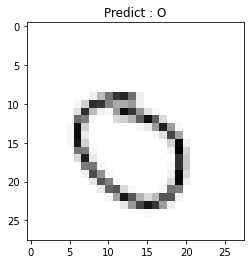

In [ ]:
n = 1

def show_prediction_result(n):
  img =imread(test_generator.filepaths[n])
  pred = model.predict(np.expand_dims(color.gray2rgb(img), axis=0))
  status = 'O' if np.argmax(pred) == 0 else 'X' 
  title = 'Predict : ' + status
  plt.imshow(img/255. , cmap='gray')
  plt.title(title)
  plt.show()

show_prediction_result(n)

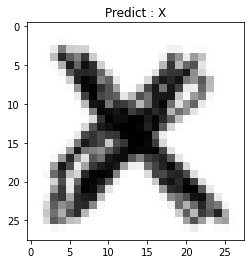

In [ ]:
show_prediction_result(15)

## 틀린 이미지 확인

In [ ]:
wrong = []

for i in range(16):
  img =imread(test_generator.filepaths[i])
  pred = model.predict(np.expand_dims(color.gray2rgb(img), axis=0))
  if np.argmax(pred) != labels[i]:
    wrong.append(i)
len(wrong)

1

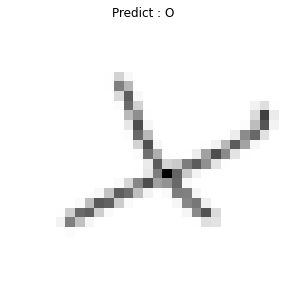

In [ ]:
plt.figure(figsize=(5,5))
img =imread(test_generator.filepaths[wrong[0]])
pred = model.predict(np.expand_dims(color.gray2rgb(img), axis=0))
status = 'O' if np.argmax(pred) == 0 else 'X' 
title = 'Predict : ' + status
plt.imshow(img/255. , cmap='gray')
plt.title(title)
plt.axis('off')
plt.show()

## 만든 모델로 종이에 그린 O, X 테스트

In [ ]:
O_paper_raw = glob('/content/drive/MyDrive/DL_data/OX dataset/paper_test/X/*')
X_paper_raw = glob('/content/drive/MyDrive/DL_data/OX dataset/paper_test/O/*')

In [ ]:
O_paper_raw

['/content/drive/MyDrive/DL_data/OX dataset/paper_test/X/20220915_123157_18.jpg',
 '/content/drive/MyDrive/DL_data/OX dataset/paper_test/X/20220915_123157_1.jpg',
 '/content/drive/MyDrive/DL_data/OX dataset/paper_test/X/20220915_123157_20.jpg',
 '/content/drive/MyDrive/DL_data/OX dataset/paper_test/X/20220915_123157_17.jpg',
 '/content/drive/MyDrive/DL_data/OX dataset/paper_test/X/20220915_123157_4.jpg',
 '/content/drive/MyDrive/DL_data/OX dataset/paper_test/X/20220915_123157_3.jpg',
 '/content/drive/MyDrive/DL_data/OX dataset/paper_test/X/20220915_123157_5.jpg',
 '/content/drive/MyDrive/DL_data/OX dataset/paper_test/X/20220915_123157_19.jpg',
 '/content/drive/MyDrive/DL_data/OX dataset/paper_test/X/20220915_123157_2.jpg',
 '/content/drive/MyDrive/DL_data/OX dataset/paper_test/X/20220915_123157_16.jpg',
 '/content/drive/MyDrive/DL_data/OX dataset/paper_test/X/20220915_123157_15.jpg',
 '/content/drive/MyDrive/DL_data/OX dataset/paper_test/X/20220915_123157_9.jpg',
 '/content/drive/MyDri

In [59]:
convert_OX(O_paper_raw,'resized_paper_test','resized_paper_O')

  0%|          | 0/20 [00:00<?, ?it/s]

In [60]:
convert_OX(X_paper_raw,'resized_paper_test','resized_paper_X')

  0%|          | 0/20 [00:00<?, ?it/s]

In [61]:
# 객체 호출
test_datagen = ImageDataGenerator(rescale=1./255)

# test 폴더 주소 던져주면, 안의 폴더에 따라 카테고리 분류를 한다.
test_generator = test_datagen.flow_from_directory(
    './drive/MyDrive/DL_data/OX dataset/resized_paper_test/',
    target_size = (28,28),
    batch_size = 7,
    class_mode = 'categorical'
)

Found 40 images belonging to 2 classes.


In [62]:
pred = model.predict(test_generator)
pred

array([[1.7206831e-03, 9.9827933e-01],
       [9.9732155e-01, 2.6784597e-03],
       [9.9999964e-01, 3.4262104e-07],
       [9.9993932e-01, 6.0704409e-05],
       [3.3472616e-06, 9.9999666e-01],
       [6.3105500e-07, 9.9999940e-01],
       [9.7834545e-01, 2.1654472e-02],
       [9.9838805e-01, 1.6119289e-03],
       [9.9995005e-01, 4.9903199e-05],
       [5.4344040e-04, 9.9945658e-01],
       [1.0000000e+00, 3.5965314e-08],
       [1.4006735e-04, 9.9985993e-01],
       [3.3342102e-01, 6.6657901e-01],
       [9.9230075e-01, 7.6992381e-03],
       [4.5590595e-04, 9.9954408e-01],
       [9.9980682e-01, 1.9325613e-04],
       [9.9958009e-01, 4.1994042e-04],
       [9.9680328e-01, 3.1967699e-03],
       [7.4640024e-01, 2.5359976e-01],
       [9.9423200e-01, 5.7680351e-03],
       [9.9955112e-01, 4.4881136e-04],
       [6.8121582e-01, 3.1878418e-01],
       [1.8369759e-02, 9.8163027e-01],
       [9.9997699e-01, 2.3010987e-05],
       [9.9999893e-01, 1.0801917e-06],
       [3.0483299e-05, 9.

In [63]:
wrong = []

for i in range(16):
  img =imread(test_generator.filepaths[i])
  pred = model.predict(np.expand_dims(color.gray2rgb(img), axis=0))
  if np.argmax(pred) != labels[i]:
    wrong.append(i)
len(wrong)

5

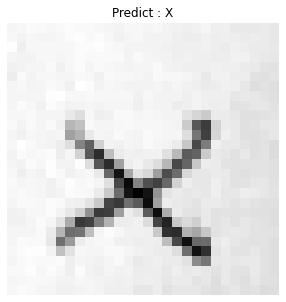

In [65]:
plt.figure(figsize=(5,5))
img =imread(test_generator.filepaths[wrong[0]])
pred = model.predict(np.expand_dims(color.gray2rgb(img), axis=0))
status = 'O' if np.argmax(pred) == 0 else 'X' 
title = 'Predict : ' + status
plt.imshow(img/255. , cmap='gray')
plt.title(title)
plt.axis('off')
plt.show()

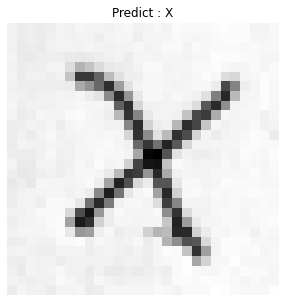

In [66]:
plt.figure(figsize=(5,5))
img =imread(test_generator.filepaths[wrong[1]])
pred = model.predict(np.expand_dims(color.gray2rgb(img), axis=0))
status = 'O' if np.argmax(pred) == 0 else 'X' 
title = 'Predict : ' + status
plt.imshow(img/255. , cmap='gray')
plt.title(title)
plt.axis('off')
plt.show()

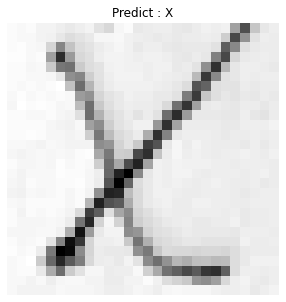

In [67]:
plt.figure(figsize=(5,5))
img =imread(test_generator.filepaths[wrong[2]])
pred = model.predict(np.expand_dims(color.gray2rgb(img), axis=0))
status = 'O' if np.argmax(pred) == 0 else 'X' 
title = 'Predict : ' + status
plt.imshow(img/255. , cmap='gray')
plt.title(title)
plt.axis('off')
plt.show()

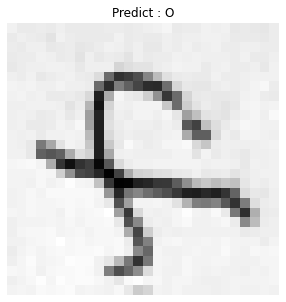

In [68]:
plt.figure(figsize=(5,5))
img =imread(test_generator.filepaths[wrong[3]])
pred = model.predict(np.expand_dims(color.gray2rgb(img), axis=0))
status = 'O' if np.argmax(pred) == 0 else 'X' 
title = 'Predict : ' + status
plt.imshow(img/255. , cmap='gray')
plt.title(title)
plt.axis('off')
plt.show()

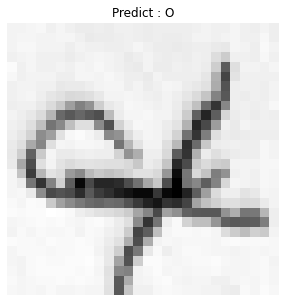

In [69]:
plt.figure(figsize=(5,5))
img =imread(test_generator.filepaths[wrong[4]])
pred = model.predict(np.expand_dims(color.gray2rgb(img), axis=0))
status = 'O' if np.argmax(pred) == 0 else 'X' 
title = 'Predict : ' + status
plt.imshow(img/255. , cmap='gray')
plt.title(title)
plt.axis('off')
plt.show()